1 - Chargement du Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

sns.set()

In [76]:
dataframe = pd.read_table('heart.txt')

In [77]:
dataframe.head()

,age,sexe,pression,cholester,sucre,electro,taux_max,angine,depression,pic,vaisseau,coeur
0,58,masculin,100,234,A,A,156,non,1,1,B,presence
1,41,feminin,130,204,A,C,172,non,14,1,A,absence
2,58,masculin,150,270,A,C,111,oui,8,1,A,presence
3,53,masculin,140,203,B,C,155,oui,31,3,A,presence
4,41,masculin,130,214,A,C,168,non,20,2,A,absence


In [78]:
df = dataframe.copy()

In [79]:
df.head()

,age,sexe,pression,cholester,sucre,electro,taux_max,angine,depression,pic,vaisseau,coeur
0,58,masculin,100,234,A,A,156,non,1,1,B,presence
1,41,feminin,130,204,A,C,172,non,14,1,A,absence
2,58,masculin,150,270,A,C,111,oui,8,1,A,presence
3,53,masculin,140,203,B,C,155,oui,31,3,A,presence
4,41,masculin,130,214,A,C,168,non,20,2,A,absence


In [80]:
df.isna().sum()

age           0
sexe          0
pression      0
cholester     0
sucre         0
electro       0
taux_max      0
angine        0
depression    0
pic           0
vaisseau      0
coeur         0
dtype: int64

2 - Prétraitement du Dataset

- Encodage des variables Qualitative

In [81]:
df_quant = df.select_dtypes(exclude=object)
df_quali = df.select_dtypes(object).drop(['coeur'],axis=1)
target = df['coeur']

In [82]:
df_quali = pd.get_dummies(df_quali)
enc = LabelEncoder()
label_encoder = enc.fit(df['coeur'])
df['coeur'] = label_encoder.transform(target)

In [85]:
y = df['coeur']

- Vérification de l'échelle des variable quantitative

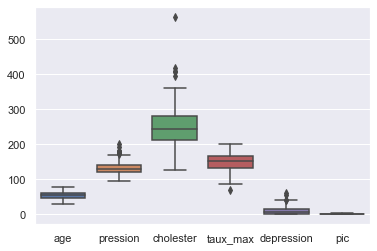

In [86]:
sns.boxplot(data = df_quant)
plt.show()

- Normalisation des variables quantitative

In [87]:
normaliser = StandardScaler()
df_quant = df_quant.drop('pic',axis=1)
df_quant[df_quant.columns] = normaliser.fit_transform(df_quant)

In [88]:
df_quant

,age,pression,cholester,taux_max,depression
0,0.392278,-1.758109,-0.303530,0.273420,-0.831083
1,-1.477460,-0.075410,-0.885033,0.965378,0.306188
2,0.392278,1.046389,0.394274,-1.672713,-0.218706
3,-0.157645,0.485490,-0.904417,0.230172,1.793389
4,-1.477460,-0.075410,-0.691199,0.792388,0.831083
...,...,...,...,...,...
265,0.832217,0.485490,0.355507,0.446409,2.230801
266,0.832217,-0.075410,-0.361681,-0.159054,0.656118
267,1.052186,-1.197209,-0.749349,-0.245549,0.656118
268,0.942201,1.046389,3.049805,0.186925,2.580731


- Vérification de l'échelle des variable quantitative

<AxesSubplot:>

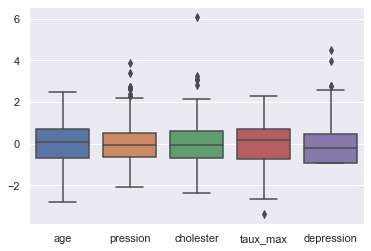

In [93]:
sns.boxplot(data = df_quant)

- Ensemblage des Dataset

In [94]:
df = pd.concat([df_quant,df['pic'],df_quali],axis=1)
df.head()

,age,pression,cholester,taux_max,depression,pic,sexe_feminin,sexe_masculin,sucre_A,sucre_B,electro_A,electro_B,electro_C,angine_non,angine_oui,vaisseau_A,vaisseau_B,vaisseau_C,vaisseau_D
0,0.392278,-1.758109,-0.303530,0.273420,-0.831083,1,0,1,1,0,1,0,0,1,0,0,1,0,0
1,-1.477460,-0.075410,-0.885033,0.965378,0.306188,1,1,0,1,0,0,0,1,1,0,1,0,0,0
2,0.392278,1.046389,0.394274,-1.672713,-0.218706,1,0,1,1,0,0,0,1,0,1,1,0,0,0
3,-0.157645,0.485490,-0.904417,0.230172,1.793389,3,0,1,0,1,0,0,1,0,1,1,0,0,0
4,-1.477460,-0.075410,-0.691199,0.792388,0.831083,2,0,1,1,0,0,0,1,1,0,1,0,0,0


- Déclaration des variable pour le modèle

In [95]:
X_train,X_test,y_train,y_test = train_test_split(df, y, test_size=.3, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(189, 19)
(81, 19)
(189,)
(81,)


3 - Modèlisation

 - Instanciation du model de Regression Linéaire

In [98]:
model = LogisticRegression()

- Entrainement du modèle

In [99]:
model.fit(X_train, y_train)

LogisticRegression()

- Score du modèle sur les données d'entrainement

In [102]:
train_score = model.score(X_train, y_train)
train_score

0.8888888888888888

 - Score du modèle sur le données de Test

In [114]:
test_score = model.score(X_test,y_test)
test_score

0.7901234567901234

- Comparaison du Score d'entrainement et le Score de test

In [115]:
print(f'Le Score d\'entrainement est :{train_score}');
print(f'Le score sur les données de Test est :{test_score}')

Le Score d'entrainement est :0.8888888888888888
Le score sur les données de Test est :0.7901234567901234


In [122]:
y_pred = model.predict(X_test)

- Précision (precision)
- Sensibilité (recall)

In [148]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        49
           1       0.76      0.69      0.72        32

    accuracy                           0.79        81
   macro avg       0.78      0.77      0.78        81
weighted avg       0.79      0.79      0.79        81



- Erreur

In [123]:
error = 1 - test_score
print(f'L\'erreur du model est {error}')

L'erreur du model est 0.2098765432098766


- Instanciation du model de KN plus proche voision

In [142]:
model_1 = KNeighborsClassifier(n_neighbors=1)
model_1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [143]:
print('Train score', model_1.score(X_train,y_train))
print('Test score', model_1.score(X_test,y_test))

Train score 1.0
Test score 0.7037037037037037


- La précision, c'est lorque le modèle prédit positif , quelle est la probabilité pour que cela cela soit vrai.
- La sensibilité c'est lorsque l'individu est positif, quelle est la probalité que le modèle dise vrai.